In [2]:
%matplotlib inline
import analysis
import matplotlib
import warnings
import logging
import sys
from importlib import reload
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.ERROR, stream=sys.stdout)

reload(analysis)

a = analysis.Analysis()
a.log.setLevel(logging.INFO)
#a.log.setLevel(logging.DEBUG)


result = '../spa_result/Analysis_Results/graviton3/metrics_analysis_1646764397.055865.csv'
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = figsize=(20, 5)
plt.rcParams["figure.dpi"] = dpi=100
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14

sns.set_palette('husl', 8)
analysis.css_styling()

/home/tuscho01/charms/python_graphs/lab-charms/lib/jujubench/estimate.py:51: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  FIELD_INFO = load(yml.read())
/home/tuscho01/charms/python_graphs/lab-charms/lib/jujubench/util.py:51: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yml.read())


In [3]:
df_v1 = pd.read_csv(result)

#print(df_v1[["Events", "Values", "Values_list"]])

In [4]:
 # Performance Metric Graphs

def plot_metrics(df, query):
    
    df_new = df.query(query)


    ax, tmp = a.graph('Events', 'Values',do_not_sort = True, title = ('XGBOOST'),
        xlabel='Events',ylabel='Values' , label = True, data = df_new, kind = 'bar')

In [5]:
def plot_timeseries(df, event, title, ylabel, show = 0):


    df_ts = df.query(event)

    values_list = str(df_ts['Values_list'].values).strip()
    #print(values_list)
    values_list = values_list.replace("\\n", " ")

    values_list = values_list[3:-3].strip().split(' ')
    #print(values_list)

    values_list = [float(a) for a in values_list if a]
    #print(values_list)
    if show == 1:
        plt.plot(values_list)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()
    else:
        return values_list
    

In [6]:
def display_graph(df, title):
    ax, tmp = a.graph('Events', 'Values',do_not_sort = True, title = (title),
            xlabel='Events',ylabel='Values' , label = True, data = df, kind = 'bar')

In [7]:
def print_pmu_groups(df, title, print_metric = 0):


    df_new_br = df.query('Events == "BR_RETIRED" or Events == "BR_MIS_PRED_RETIRED" or Events == "BR_IMMED_SPEC" or Events == "BR_RETURN_SPEC" or Events == "BR_INDIRECT_SPEC"')
    df_new_tlb = df.query('Events == "DTLB_WALK" or Events == "ITLB_WALK" or Events == "L1D_TLB_REFILL" or Events == "L1I_TLB" or Events == "L1I_TLB_REFILL" or Events == "L2D_TLB" or Events == "L2D_TLB_REFILL"')
    
    df_new_l1i = df.query('Events == "L1I_CACHE" or Events == "L1I_CACHE_REFILL"')
    df_new_l1d = df.query('Events == "L1D_CACHE" or Events == "L1D_CACHE_REFILL" or Events == "L1D_CACHE_RD" or Events == "L1D_CACHE_WR"')
    df_new_cmt = df.query('Events == "MEM_ACCESS" or Events == "MEM_ACCESS_RD" or Events == "MEM_ACCESS_WR"')
    df_new_uni = df.query('Events == "L2D_CACHE" or Events == "L2D_CACHE_REFILL" or Events == "L2D_CACHE_ALLOCATE" or Events == "L2D_CACHE_RD" or Events == "L2D_CACHE_WR"')
    df_new_llc = df.query('Events == "L3D_CACHE" or Events == "L3D_CACHE_REFILL" or Events == "L3D_CACHE_ALLOCATE" or Events == "LL_CACHE_RD" or Events == "LL_CACHE_WR"')
    df_new_inmix = df.query('Events == "INST_SPEC" or Events == "LD_SPEC" or Events == "ST_SPEC" or Events == "DP_SPEC" or Events == "ASE_SPEC" or Events == "VFP_SPEC" or Events == "CRYPTO_SPEC" or Events == "BR_IMMED_SPEC" or Events == "BR_RETURN_SPEC" or Events == "BR_INDIRECT_SPEC"')
    df_set = {'Branch Effectiveness': df_new_br, 'TLB Effectiveness': df_new_tlb, 'L1I Cache Effectiveness': df_new_l1i, 'L1D Cache Effectiveness': df_new_l1d, 'Core Memory Traffic': df_new_cmt, 'Unified L2 Cache Effectiveness': df_new_uni, 'LLC Effectiveness': df_new_llc, 'Instruction Mix': df_new_inmix}
   
    if print_metric == 0:
        for key in df_set:
            display_graph(df_set[key], title + ": " + key)
   

    

# Performance Methodology

                     Events        Values                                        Values_list
0                   SW_INCR  0.000000e+00                                       [0, 0, 0, 0]
1          L1I_CACHE_REFILL  8.146457e+07           [91404494, 91320190, 91409402, 51724176]
2            L1I_TLB_REFILL  5.928266e+06               [6663711, 6650911, 6636808, 3761636]
3          L1D_CACHE_REFILL  1.215605e+05                   [154977, 113315, 104172, 113778]
4                 L1D_CACHE  1.594747e+07           [18181570, 17224998, 17065592, 11317735]
5            L1D_TLB_REFILL  7.407725e+04                       [72034, 79348, 74348, 70579]
6              INST_RETIRED  1.530100e+08       [173508179, 169567487, 168465794, 100498511]
7                 EXC_TAKEN  1.370000e+03                            [1963, 1353, 1216, 948]
8                EXC_RETURN  1.298500e+03                            [1875, 1309, 1130, 880]
9         CID_WRITE_RETIRED  0.000000e+00                             

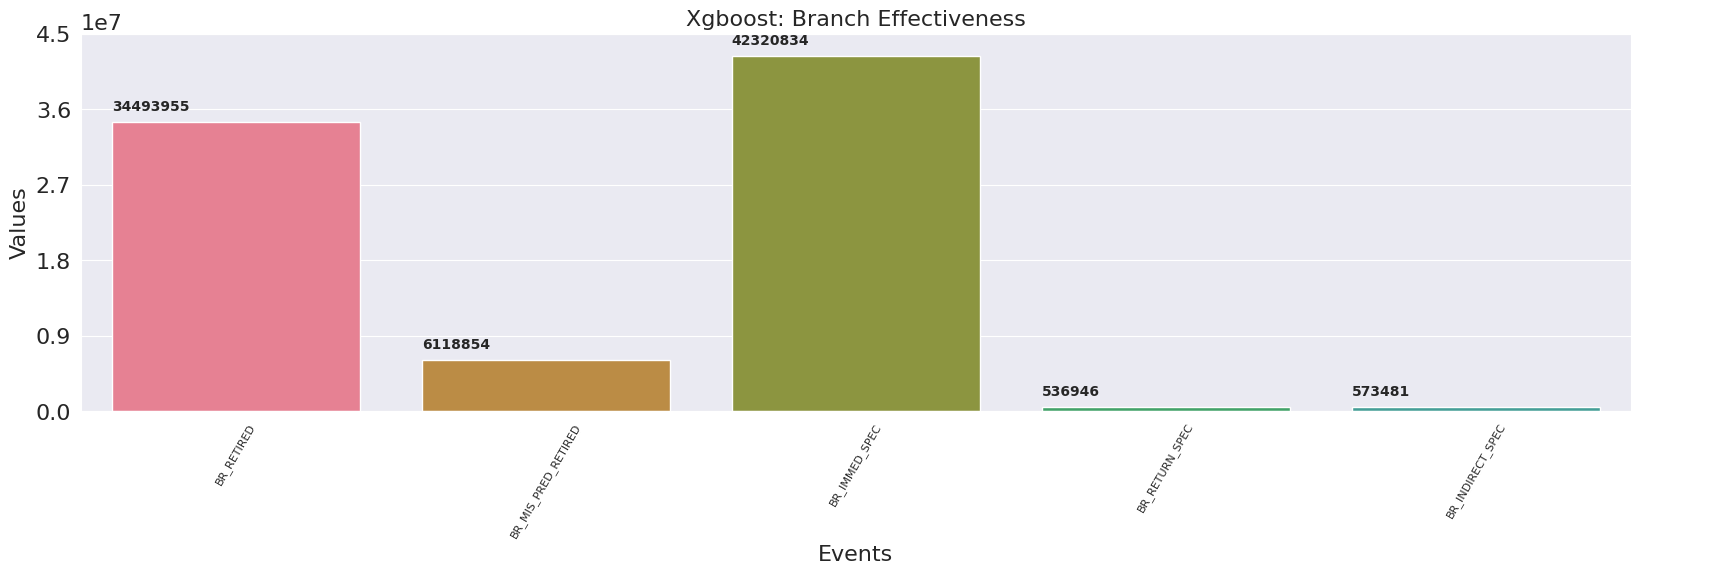

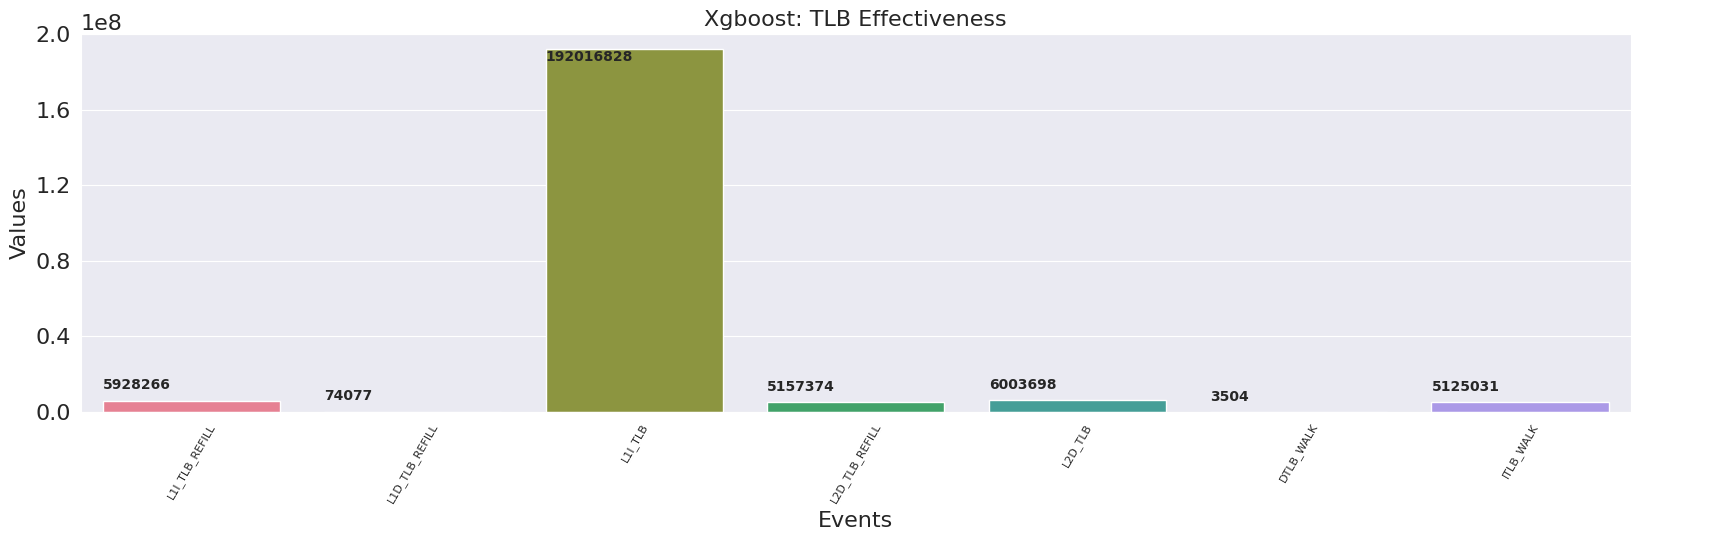

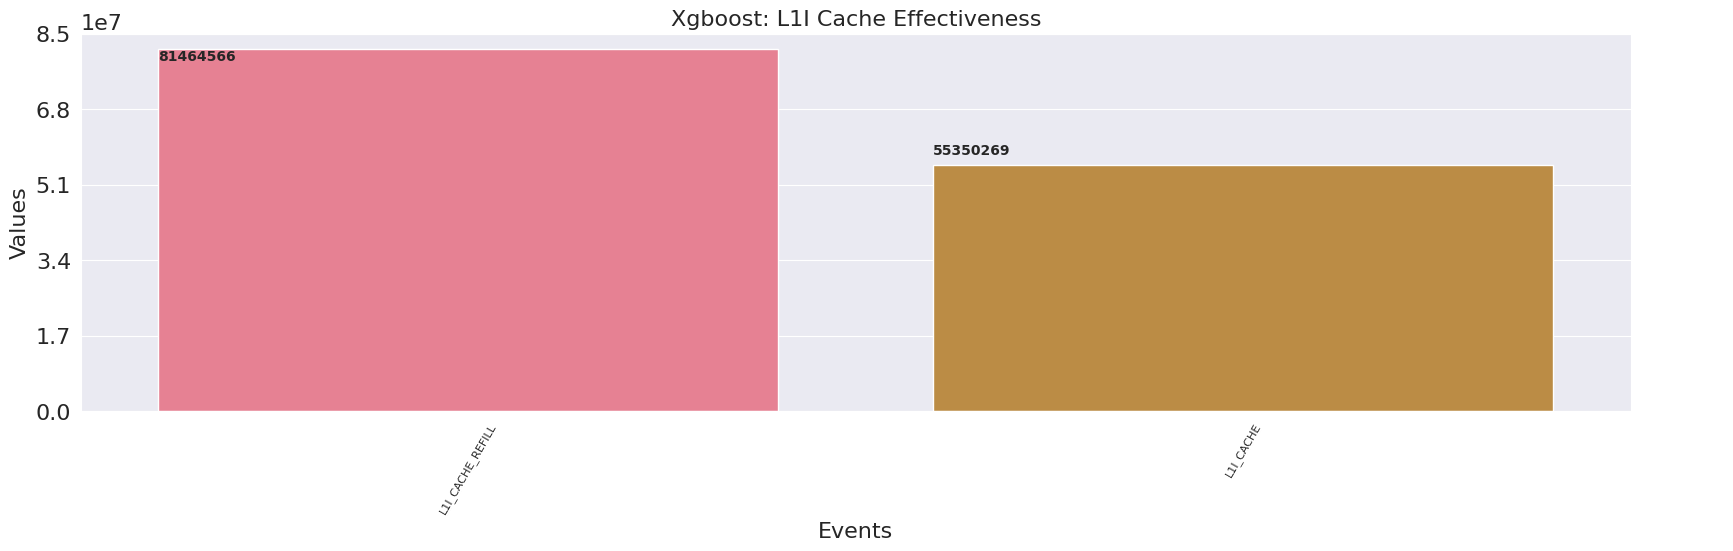

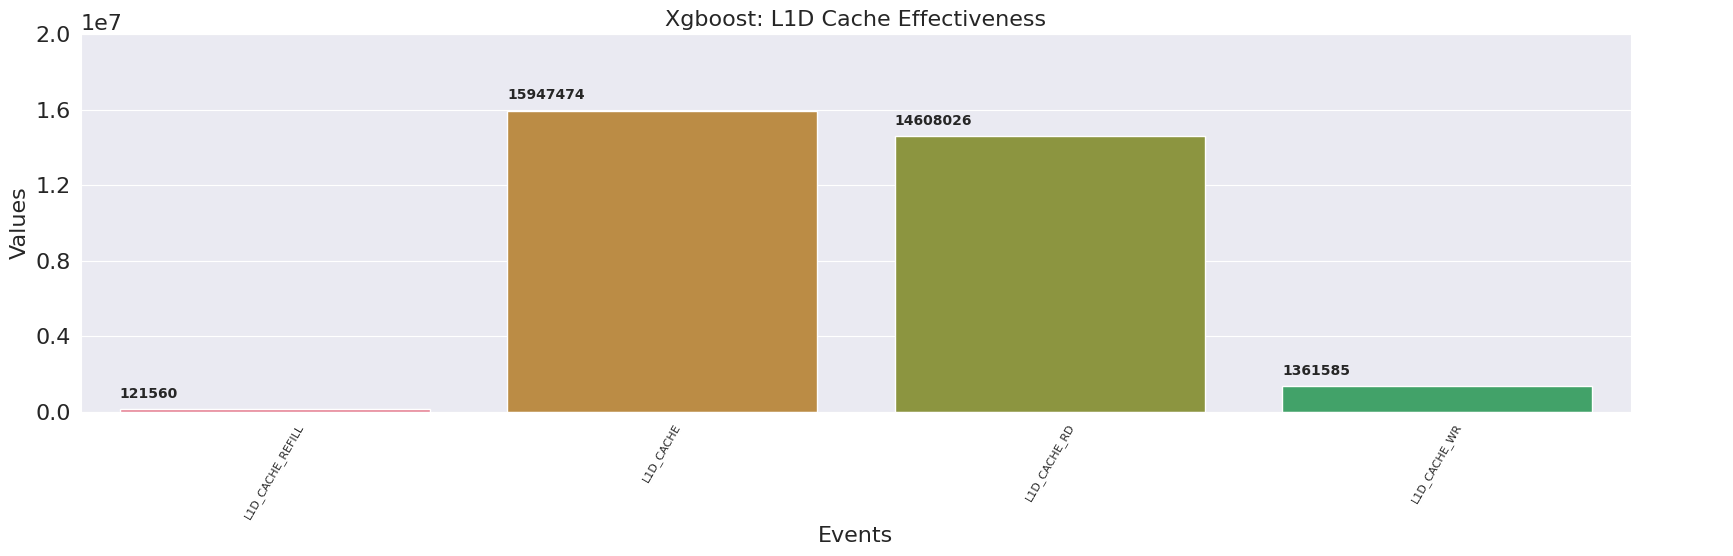

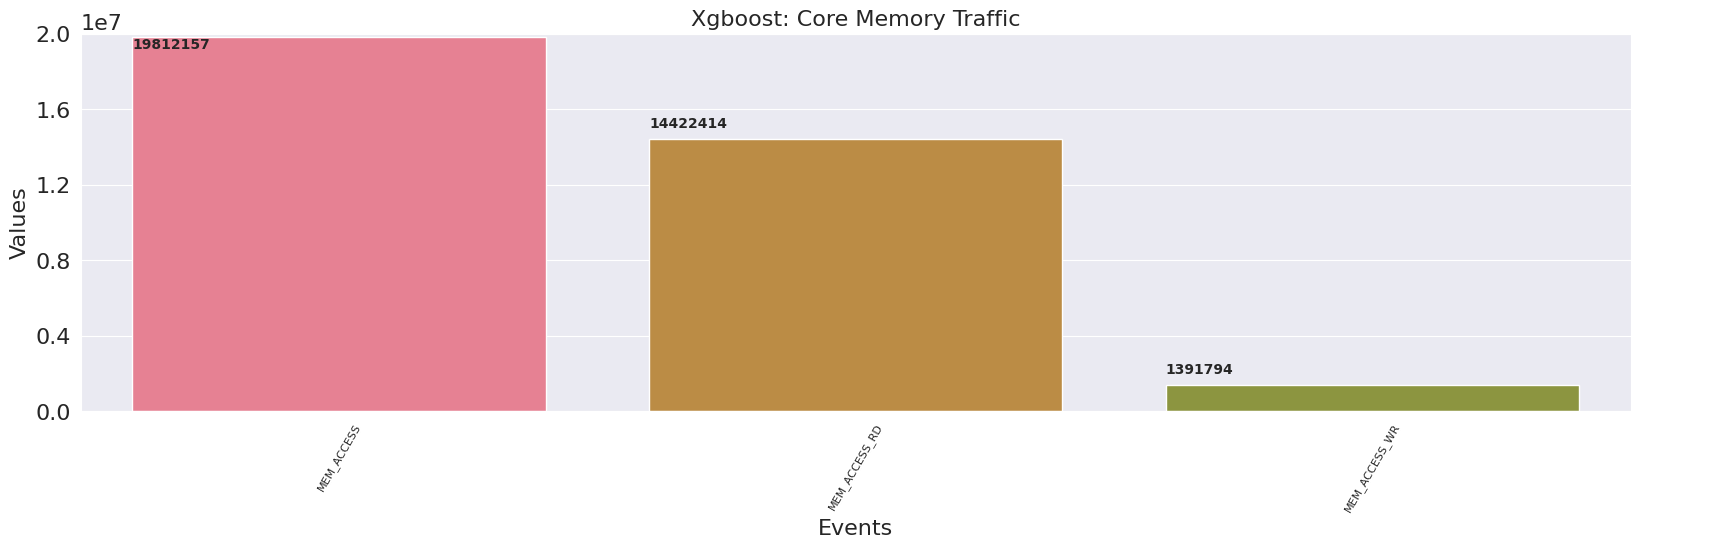

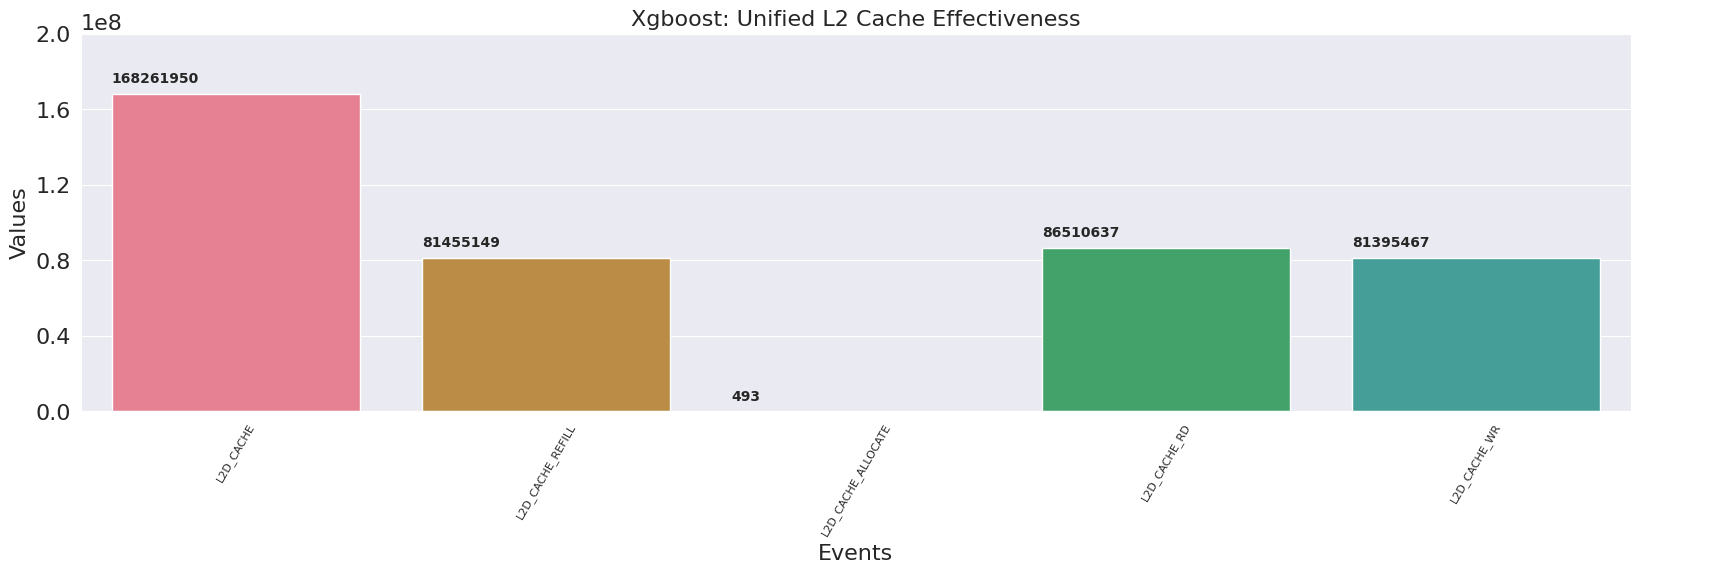

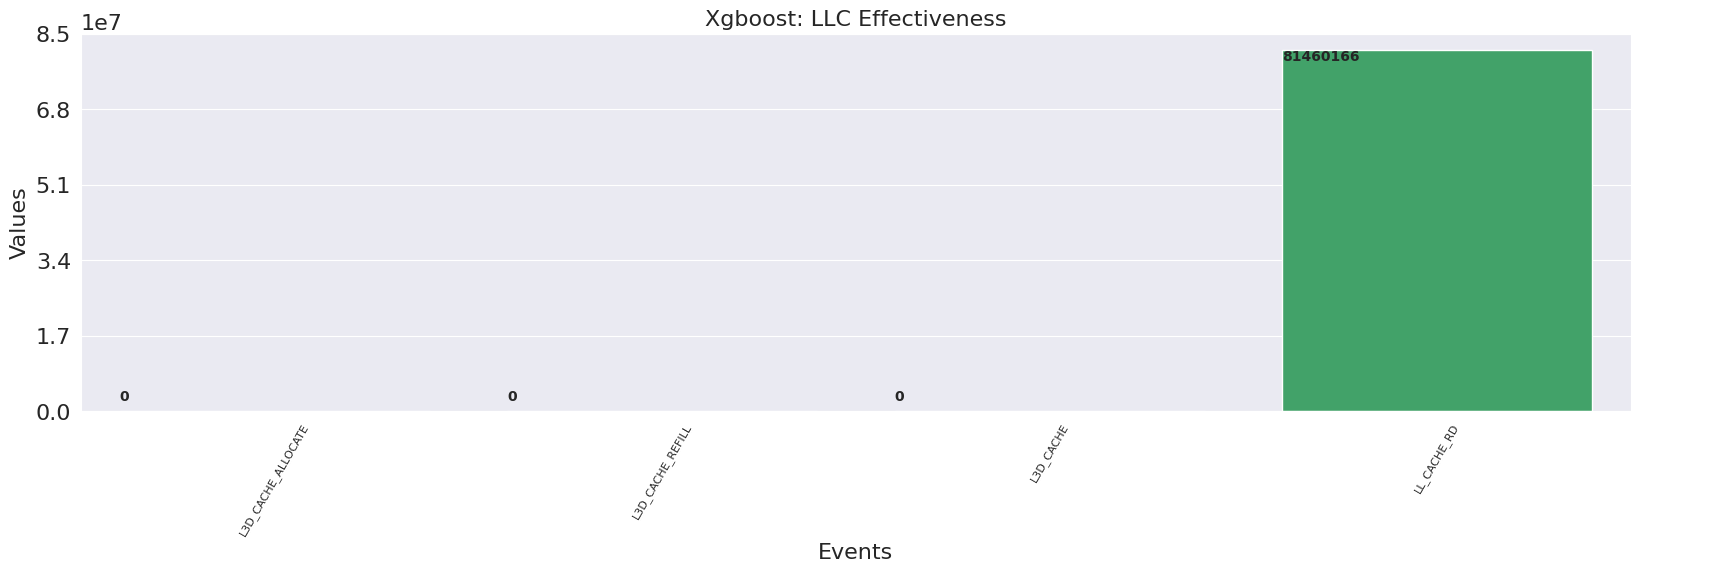

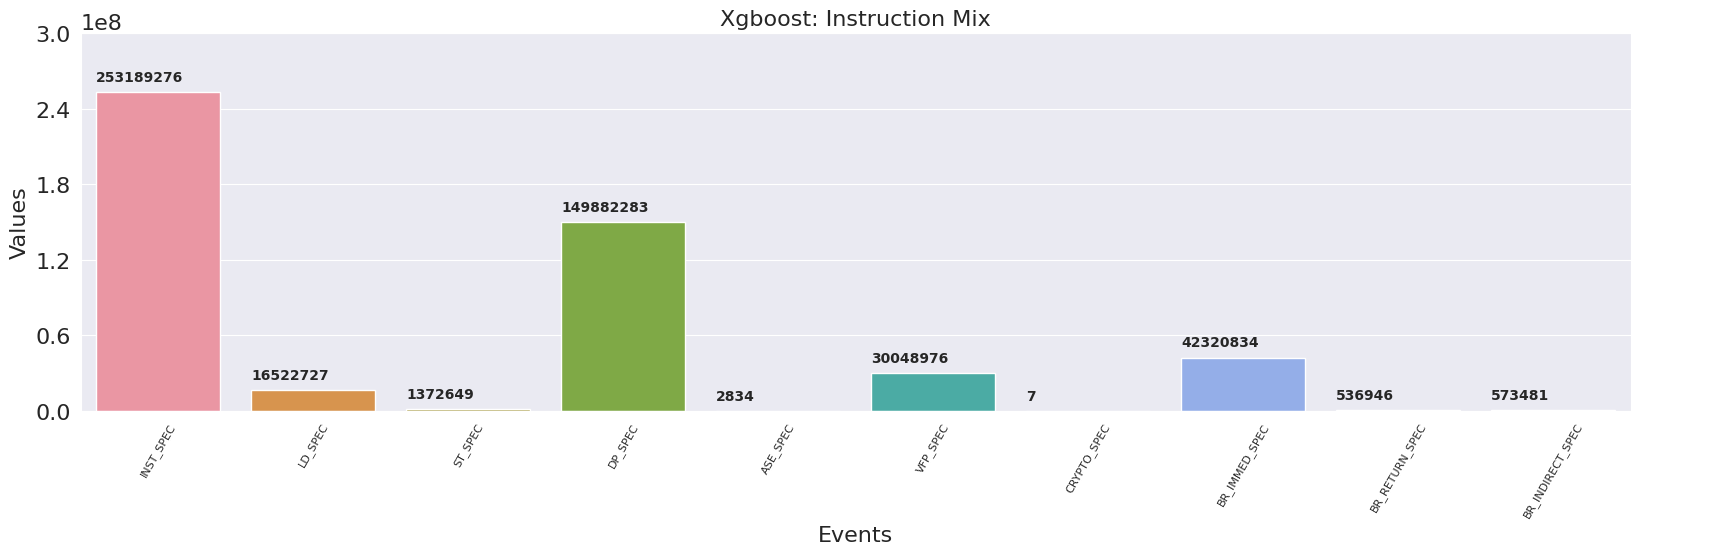

In [8]:
result_v1 = '../spa_result/Analysis_Results/graviton3/raw_events_analysis_1646764397.055865.csv'
raw_pmu_v1 = pd.read_csv(result_v1)

print_pmu_groups(raw_pmu_v1, "Xgboost")
print(raw_pmu_v1[["Events", "Values", "Values_list"]])

# TopDown Metrics

In [9]:
result_v1 = '../spa_result/Analysis_Results/graviton3/metrics_analysis_1646764397.055865.csv'
metrics_pmu_v1 = pd.read_csv(result_v1)
print(df_v1[["Events", "Values", "Values_list"]])

                         Events        Values                                        Values_list
0                           IPC  1.302893e-01      [0.13119549 0.12815059 0.12764007 0.13417091]
1                      L1I MPKI  5.306563e+02  [526.80222066 538.54775827 542.59918188 514.67...
2                  L1I_TLB MPKI  3.861347e+01  [38.4057457  39.22279629 39.39558199 37.42976849]
3                  L1D_TLB MPKI  5.066796e-01      [0.41516198 0.46794348 0.44132401 0.70228901]
4                  L2D_TLB MPKI  3.359989e+01  [33.25518159 34.17562    34.34180235 32.62694111]
5                      L1D MPKI  8.279873e-01      [0.89319709 0.668259   0.61835698 1.13213618]
6                      L2D MPKI  5.302445e+02  [526.52392254 539.63169248 543.67811901 511.14...
7                   BRANCH MPKI  3.979751e+01  [39.25178075 40.33135786 41.57365619 38.03323016]
8                DTLB_WALK MPKI  2.311215e-02      [0.03039626 0.0196382  0.01694112 0.02547301]
9                ITLB_WALK MPK